In [1]:
train_path = r"../Data/bag_level/train.txt"
test_path = r"../Data/bag_level/test.txt"

In [4]:
class_cnt_dict = {}
with open(train_path, 'r', encoding='utf-8')as f:
    for line in f:
        lin = line.strip()
        if lin and len(lin.split('\t')) == 3:
            lin = lin.split('\t')
            try:
                class_cnt_dict[lin[-1]] += 1
            except KeyError:
                class_cnt_dict[lin[-1]] = 1

with open(test_path, 'r', encoding='utf-8')as f:
    for line in f:
        lin = line.strip()
        if lin and len(lin.split('\t')) == 3:
            lin = lin.split('\t')
            try:
                class_cnt_dict[lin[-1]] += 1
            except KeyError:
                class_cnt_dict[lin[-1]] = 1

class_cnt_dict = sorted(class_cnt_dict.items(), key=lambda x:x[1], reverse=True)

[('NA', 673982), ('疾病\\可使用检查\\检查', 34834), ('症状\\是临床表现\\疾病', 31524), ('症状\\是诊断依据\\疾病', 18537), ('疾病\\别名\\疾病', 17429), ('治疗\\可治疗\\疾病', 14068), ('症状\\有就诊科室\\科室', 12739), ('症状\\可使用检查\\检查', 10849), ('疾病\\有发生部位\\人体', 9103), ('疾病\\有就诊科室\\科室', 8981), ('疾病\\有并发症\\疾病', 8952), ('检查\\有作用对象\\人体', 8332), ('特定人群\\是多发群体\\疾病', 7200), ('药品\\可治疗\\疾病', 4723), ('检查\\有就诊科室\\科室', 4095), ('操作\\可治疗\\疾病', 2949), ('疾病\\导致\\症状', 2862), ('药品\\有禁忌人群\\特定人群', 1728), ('检查\\别名\\检查', 1433), ('操作\\有作用对象\\人体', 1395), ('疾病\\subClassOf\\疾病', 1386), ('检查\\subClassOf\\检查', 1141), ('药品\\subClassOf\\药品', 935), ('操作\\有就诊科室\\科室', 864), ('症状\\伴随\\症状', 814), ('药品\\有成分\\药品', 762), ('药品\\别名\\药品', 688), ('操作\\有禁忌人群\\特定人群', 652), ('操作\\有操作对象\\人体', 496), ('症状\\有发生部位\\人体', 425), ('操作\\别名\\操作', 274), ('疾病\\英文名\\疾病', 210), ('药品\\有功效\\效果', 192)]


In [9]:
import pandas as pd

class_name = [_[0] for _ in class_cnt_dict]
cnt_num = [_[1] for _ in class_cnt_dict]


dataframe = pd.DataFrame({'class_name': class_name, 'count': cnt_num})
dataframe.to_csv("data_statistic.csv", index=False, sep=',', encoding='utf_8_sig')

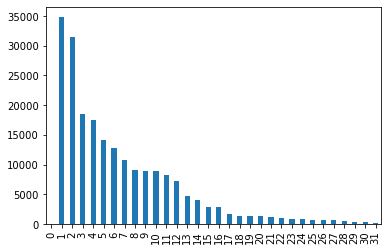

In [14]:
import matplotlib.pyplot as plt

# data= pd.Series(dataframe['count'][:],index=range(len(class_name)))
# data.plot.bar()

no_na_data= pd.Series(dataframe['count'][1:],index=range(len(class_name) - 1))
no_na_data.plot.bar()